In [1]:
from gensim.models.doc2vec import  Doc2Vec, TaggedDocument
from nltk import word_tokenize
import pandas as pd  
import string 
import numpy as np


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [2]:
input_data7 = pd.read_csv('input_data7.csv', header = 0,
                          usecols= ['patent_id', 'combined'],
                          dtype = {'patent_id':object},
                          encoding = 'ISO-8859-1')

In [3]:
my_columns = input_data7['patent_id'].tolist() # create patent list
corpus = input_data7['combined'].tolist()
patent_numbers = '|'.join(my_columns)

In [4]:
#preprocessing 


patent_terms = pd.read_csv('patent_terms.csv', encoding = 'ISO-8859-1')
patent_terms = patent_terms.rename(columns={0:'terms'})
patent_terms_append = ['claim','claimed','according','selected','comprising','consisting','means','le','wt','group','thereof','weight']
patent_terms = patent_terms.append(pd.DataFrame(patent_terms_append, columns=['terms']), ignore_index=True)
patent_terms = patent_terms.drop_duplicates()
patent_terms.to_csv('patent_terms.csv', index=False)

jargon = set(patent_terms.iloc[:, 0])  # build a "patent jargon" lexical
''' jargon removes word "containing", we want to weigh lignosulfonate which follows!'''

## Punctuation
# nltk.download('punkt')
punctuations = set(string.punctuation)
punctuations.remove('-') # maybe remove hyphens
#punctuations.remove('/')

from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
word_len = 2
def clean(doc):
    number_free = ''.join([c for c in doc if c not in "1234567890"])
    words = [word.strip(string.punctuation) for word in number_free.split(" ")]
    filtered = [f for f in words if f and f.lower() not in stop_words]
    undo = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in filtered]).strip()
    punc_free = ''.join(ch for ch in undo if ch not in punctuations)
    smallword_free = ' '.join([w for w in punc_free.split() if len(w) > word_len])
    lemmatized = " ".join(lemma.lemmatize(word) for word in smallword_free.split())
    jargon_free = " " .join([j for j in lemmatized.lower().split() if j not in jargon])
    return jargon_free

In [5]:
corpus_clean = [clean(doc) for doc in corpus] # list of sentance strings
#corpus_tokenize = [clean(doc).split() for doc in corpus]  # list of string words

In [6]:
corpus_clean[0]

'plywood adhesive phenolic plywood adhesive containing lignosulfonates trialkyl phosphate alkyltituents carbon atom use curtain coater described process applying phenol-formaldehyde resin adhesive containing amylaceous proteinaceous material plywood veneer using curtain coater improvement comprises adding least percent based upon weight phenol-formaldehyde resin said adhesive sodium base lignosulfonate percent based upon weight phenol-formaldehyde resin trialkyl phosphate alkyltituents carbon atomsa process according claim wherein trialkyl phosphate tributyl phosphatea process according claim wherein sodium base lignosulfonate added amount weight percenta process according claim wherein trialkyl phosphate tributyl phosphate added amount percenta process according claim wherein sodium lignosulfonate added phenol formaldehyde mixture condensation phenol formaldehyde preparation phenol-formaldehyde resina process according claim wherein lignosulfonate added amount weight percent trialkyl 

In [7]:
data = data_df['combined'].tolist()

NameError: name 'data_df' is not defined

In [ ]:
tagged_data = [TaggedDocument(words= word_tokenize(_d.lower()), tags = [str(i)])
              for i, _d in enumerate(corpus_clean)]

#Need to figure out how to make the patent ID the document tag
# tagged_data = [TaggedDocument(words= word_tokenize(_d.lower()), tags = [str(i)])
#               for i, _d in enumerate(data)]








In [ ]:
len(tagged_data)

Training the model

In [ ]:
max_epochs = 100
vec_size = 300
alpha = 0.025

model = Doc2Vec(size= vec_size,
               alpha = alpha,
                min_alpha = 0.0025,
                min_count = 1, 
                dm = 1
               )

model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("patentd2v_model")
print("Model Saved")

Load saved model

In [8]:
modell = Doc2Vec.load('patentd2v_model')

In [9]:
# to find most similar doc using tags
similar_doc = modell.docvecs.most_similar("1")
print(similar_doc)

[('306', 0.4959915578365326), ('123', 0.4942142367362976), ('76', 0.4361250698566437), ('41', 0.4006164073944092), ('222', 0.3942888379096985), ('4931', 0.3793490529060364), ('230', 0.3686369061470032), ('5500', 0.3670188784599304), ('5153', 0.36132562160491943), ('4270', 0.35854288935661316)]


In [ ]:
input_data7['combined'].iloc[1]

In [ ]:
input_data7['combined'].iloc[306]

In [ ]:
input_data7['combined'].iloc[123]

In [8]:
test_patent = ('''A lock for a height-adjustable crib or playpen requires two distinct manual operations in order to release 
the lock on each crib leg. Each lock includes a rigid metal bracket which engages around the extensible part o
f the leg and is pivotally connected to a crib corner post. The bracket has a nose which projects into one of a 
series of openings in the extensible part of the leg then the bracket is swung against the leg part to prevent
movement of the leg part relative to the post. The upper edge of the bracket is slotted to receive a latch pivotally 
connected to the corner post just above the bracket. The latch drops into the slot when the nose is engaged in one of the openings 
so that the bracket cannot be moved.''')

In [9]:
test_clean = word_tokenize(clean(test_patent))

In [10]:
test_clean

['lock',
 'height-adjustable',
 'crib',
 'playpen',
 'requires',
 'two',
 'distinct',
 'manual',
 'operation',
 'order',
 'release',
 'the',
 'lock',
 'crib',
 'leg',
 'lock',
 'includes',
 'rigid',
 'metal',
 'bracket',
 'engages',
 'around',
 'extensible',
 'part',
 'leg',
 'pivotally',
 'connected',
 'crib',
 'corner',
 'post',
 'bracket',
 'nose',
 'project',
 'one',
 'series',
 'opening',
 'extensible',
 'part',
 'leg',
 'bracket',
 'swung',
 'leg',
 'part',
 'prevent',
 'movement',
 'leg',
 'part',
 'relative',
 'post',
 'upper',
 'edge',
 'bracket',
 'slotted',
 'receive',
 'latch',
 'pivotally',
 'connected',
 'corner',
 'post',
 'bracket',
 'latch',
 'drop',
 'slot',
 'nose',
 'engaged',
 'one',
 'opening',
 'bracket',
 'can',
 'not',
 'moved']

In [11]:
v1 = modell.infer_vector(test_clean)
print("V1_infer", v1)


V1_infer [-0.04030685  0.0164468  -0.10938199  0.11172227 -0.27933139  0.0949602
 -0.00897889 -0.04153188 -0.15085219  0.13162388 -0.03932405 -0.12531696
  0.06472462  0.19959116  0.1742947  -0.2275946  -0.05192436 -0.05462615
  0.09428885 -0.07154346 -0.03585803 -0.07133634 -0.13248976  0.22784516
 -0.22693597 -0.07257064  0.01155051  0.02804785 -0.02612884 -0.58267277
  0.3228327  -0.22126426 -0.16614163 -0.14665188 -0.15851234 -0.05989475
  0.2285192   0.03679378 -0.1760561   0.26493752  0.08990586 -0.17702998
 -0.030691    0.25298601  0.12066796  0.20617062 -0.07088923  0.18358961
  0.23940226 -0.01108274  0.03436133 -0.1583766   0.30996263 -0.0367334
 -0.09354211 -0.09420026 -0.02217169  0.20984879 -0.03668894  0.11460694
  0.13522792 -0.01543892  0.16124555  0.24005471 -0.00194501  0.25790584
  0.01635198  0.11777687  0.08735573  0.01675909 -0.03850939 -0.04187882
  0.07002063 -0.09799601  0.07937963 -0.12143995 -0.17074279  0.07580765
  0.15392832 -0.06041971 -0.11306201 -0.0865

In [13]:
vector_1 = modell.docvecs["1"]

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
cosine_similarity(vector_1, v1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.23555079]], dtype=float32)

In [20]:
similar_doc_test = modell.docvecs.most_similar([v1])
print(similar_doc_test)

[('4736', 0.39907604455947876), ('3495', 0.3743804097175598), ('328', 0.36231088638305664), ('2475', 0.3619901239871979), ('5498', 0.35550662875175476), ('3964', 0.3530780076980591), ('5514', 0.3527734577655792), ('1240', 0.35154613852500916), ('1771', 0.3512061536312103), ('2102', 0.3510683476924896)]


In [40]:
input_data7['combined'].iloc[0]

'Plywood adhesive A phenolic plywood adhesive containing lignosulfonates and a trialkyl phosphate having alkyltituents of from 1 to 6 carbon atoms for use in a curtain coater is described. In a process of applying a phenol-formaldehyde resin adhesive containing amylaceous or proteinaceous materials to plywood veneer using a curtain coater, the improvement which comprises adding at least 1 percent, based upon the weight of the phenol-formaldehyde resin in said adhesive, of a sodium base lignosulfonate and from 0.05 to 1 percent, based upon the weight of the phenol-formaldehyde resin, of a trialkyl phosphate having alkyltituents of from 1 to 6 carbon atoms.,A process according to claim 1 wherein the trialkyl phosphate is tributyl phosphate.,A process according to claim 1 wherein a sodium base lignosulfonate is added in an amount of from 3 to 6 weight percent.,A process according to claim 1 wherein the trialkyl phosphate is tributyl phosphate and is added in an amount of from 0.25 to 0.75

## Clustering 

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# for doc in corpus_clean:
#     doc_vecs = modell.infer_vector(doc.split())
# # creating a matrix from list of vectors
# mat = np.stack(doc_vecs)

# # Clustering Kmeans
# km_model = KMeans(n_clusters=5)x
# km_model.fit(mat)
# # Get cluster assignment labels
# labels = km_model.labels_


In [11]:
mat = modell.docvecs[0]
mat = mat.reshape(1,300)

for i in range(1, 5651):
    doc_vec = modell.docvecs[i]
    doc_vec = doc_vec.reshape(1,300)
    mat = np.vstack((mat,doc_vec))

In [12]:
b = doc_vec.reshape(1,300)

In [13]:
np.vstack(b).shape

(1, 300)

In [14]:
mat.shape
X=mat

In [25]:
covar_matrix = PCA(n_components = 300)

covar_matrix.fit(X)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features



array([   1.6,    2.9,    4.1,    5.2,    6.2,    7.2,    8.2,    9.1,
         10. ,   10.8,   11.6,   12.4,   13.2,   14. ,   14.7,   15.4,
         16.1,   16.8,   17.5,   18.2,   18.9,   19.6,   20.2,   20.8,
         21.4,   22. ,   22.6,   23.2,   23.8,   24.4,   25. ,   25.6,
         26.2,   26.8,   27.4,   27.9,   28.4,   28.9,   29.4,   29.9,
         30.4,   30.9,   31.4,   31.9,   32.4,   32.9,   33.4,   33.9,
         34.4,   34.9,   35.4,   35.9,   36.4,   36.9,   37.4,   37.9,
         38.4,   38.9,   39.4,   39.8,   40.2,   40.6,   41. ,   41.4,
         41.8,   42.2,   42.6,   43. ,   43.4,   43.8,   44.2,   44.6,
         45. ,   45.4,   45.8,   46.2,   46.6,   47. ,   47.4,   47.8,
         48.2,   48.6,   49. ,   49.4,   49.8,   50.2,   50.6,   51. ,
         51.4,   51.8,   52.2,   52.6,   53. ,   53.4,   53.8,   54.2,
         54.6,   55. ,   55.4,   55.8,   56.2,   56.6,   56.9,   57.2,
         57.5,   57.8,   58.1,   58.4,   58.7,   59. ,   59.3,   59.6,
      

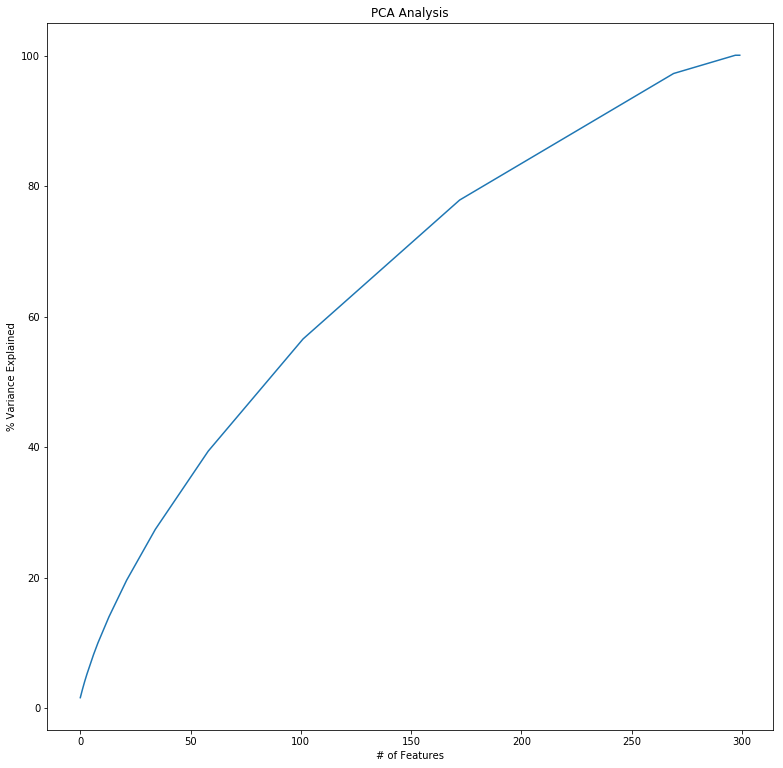

In [29]:
plt.figure(figsize=(13,13))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [72]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init='k-means++', n_clusters=5)
kmeans.fit(reduced_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min(), reduced_data[:, 0].max() 
y_min, y_max = reduced_data[:, 1].min(), reduced_data[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [74]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#Z = kmeans.predict(reduced_data([:100],[:]))
Z.shape
xx.shape

(1430, 1480)

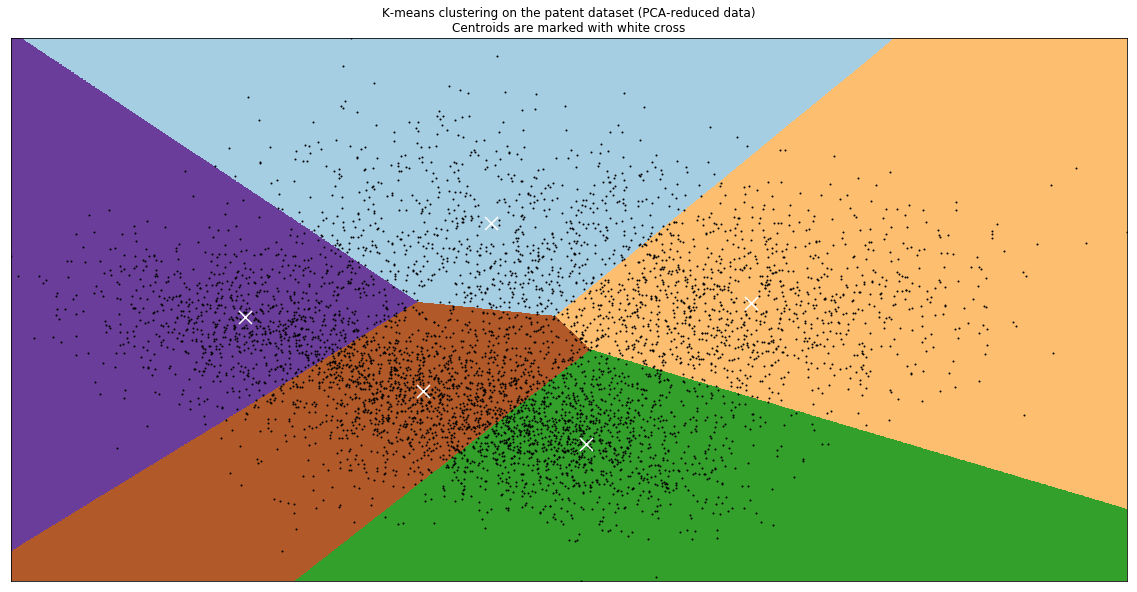

In [75]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the patent dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [65]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(reduced_data)
    Sum_of_squared_distances.append(km.inertia_)

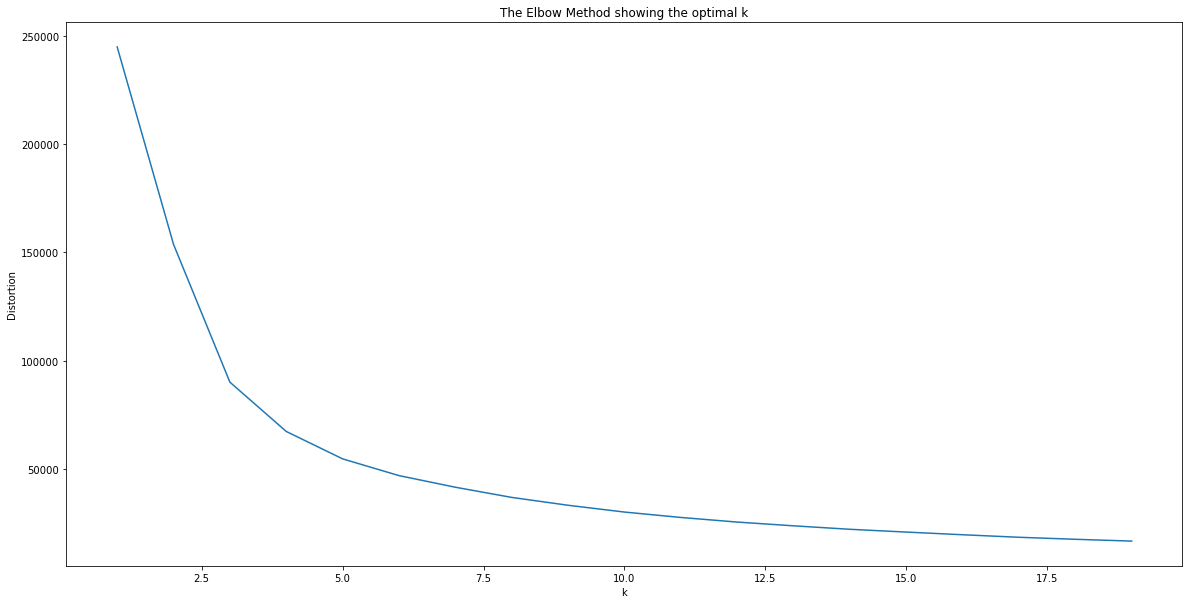

In [66]:
plt.figure(figsize=(20,10))
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [67]:
reduced_data[:100, :].shape

(100, 2)